### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
test.shape

(99762, 41)

In [4]:
data.shape

(199523, 41)

In [5]:
data.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000


## Exploring Data

In [6]:
columns = data.columns

In [7]:
test['income_level'].unique()

array(['-50000', ' 50000+.'], dtype=object)

In [8]:
data.income_level[data['income_level'] > 0].head()
#test.income_level[test['income_level'] > 0]

57    50000
64    50000
68    50000
80    50000
88    50000
Name: income_level, dtype: int64

In [9]:
data['income_level'] = (data['income_level']>0).astype(int)
#test['income_level'] = (test['income_level']>0).astype(int)

In [10]:
a = []
for i in test.income_level:
    if i == '-50000':
        a.append(0)
    else:
        a.append(1)
    

In [11]:
test['income_level'] = a
test.income_level.head()

0    0
1    0
2    0
3    0
4    0
Name: income_level, dtype: int64

In [12]:
data.income_level.head()

0    0
1    0
2    0
3    0
4    0
Name: income_level, dtype: int32

In [13]:
data.class_of_worker.unique()

array(['Not in universe', 'Self-employed-not incorporated', 'Private',
       'Local government', 'Federal government',
       'Self-employed-incorporated', 'State government', 'Never worked',
       'Without pay'], dtype=object)

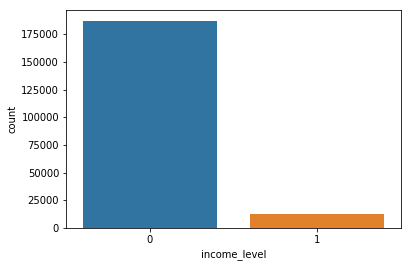

In [14]:
sns.countplot(data.income_level)

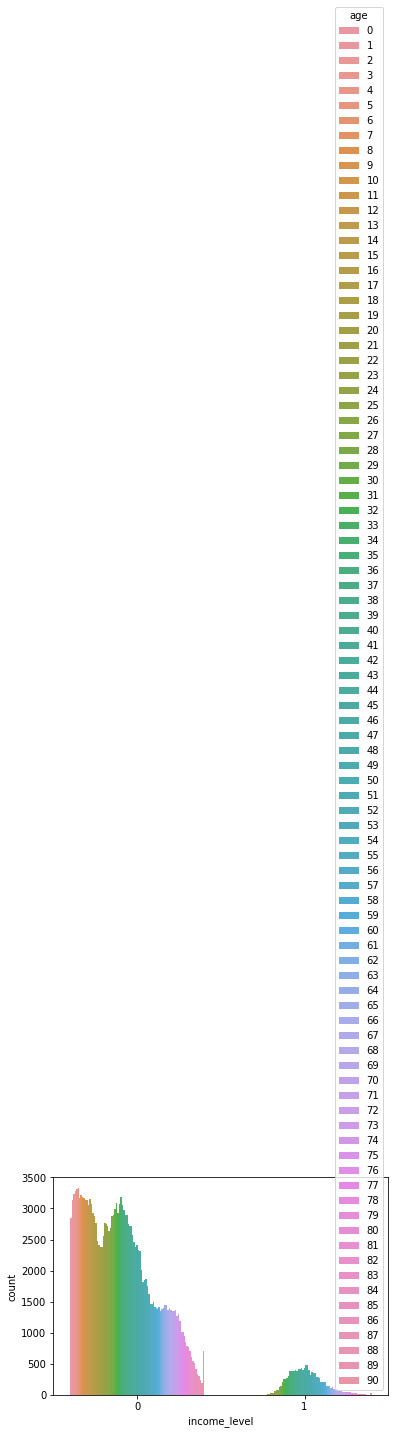

In [15]:
sns.countplot(data['income_level'], hue = data['age'])

In [16]:
columns

Index(['age', 'class_of_worker', 'industry_code', 'occupation_code',
       'education', 'wage_per_hour', 'enrolled_in_edu_inst_lastwk',
       'marital_status', 'major_industry_code', 'major_occupation_code',
       'race', 'hispanic_origin', 'sex', 'member_of_labor_union',
       'reason_for_unemployment', 'full_parttime_employment_stat',
       'capital_gains', 'capital_losses', 'dividend_from_Stocks',
       'tax_filer_status', 'region_of_previous_residence',
       'state_of_previous_residence', 'd_household_family_stat',
       'd_household_summary', 'migration_msa', 'migration_reg',
       'migration_within_reg', 'live_1_year_ago', 'migration_sunbelt',
       'num_person_Worked_employer', 'family_members_under_18',
       'country_father', 'country_mother', 'country_self', 'citizenship',
       'business_or_self_employed', 'fill_questionnaire_veteran_admin',
       'veterans_benefits', 'weeks_worked_in_year', 'year', 'income_level'],
      dtype='object')

In [17]:
def unique_values(df):
    for col in df.columns:
        print("Column : {}".format(col))
        print(Counter(data[str(col)]))
        print("#################################################################################################")


In [1]:
unique_values(data)

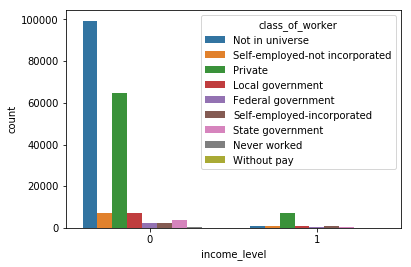

In [19]:
sns.countplot(data['income_level'], hue = data['class_of_worker'])

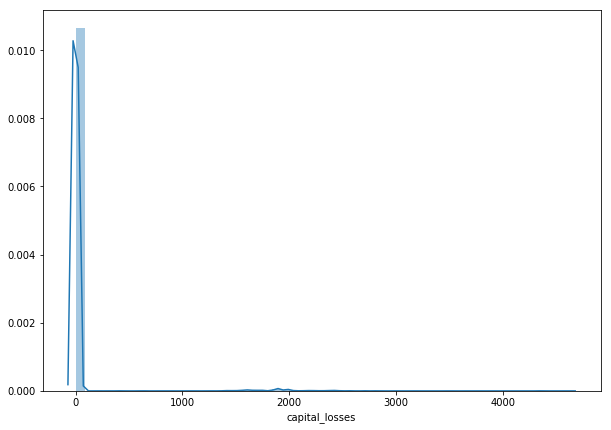

In [20]:
plt.figure(figsize = (10, 7))
sns.distplot(data['capital_losses'])

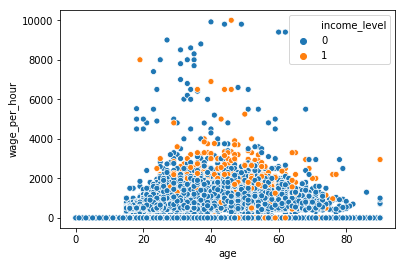

In [21]:
sns.scatterplot(data['age'], data['wage_per_hour'], hue = data['income_level'])

## Cleaning Data

In [22]:
# Converting age to bins
data['age'] = pd.cut(data.age, bins = [0,25,65,90], labels=["young", "adult", "old"])
test['age'] = pd.cut(test.age, bins = [0,25,65,90], labels=["young", "adult", "old"])

In [23]:
# Converting some more columns to bins
def makeBins(df):
    df = pd.cut(df, bins = [-1,0,df.max()], labels=["Zero", "MoreThanZero"])
    return df

for col in ['wage_per_hour', 'capital_gains', 'capital_losses', 'dividend_from_Stocks']:
    data[col] = makeBins(data[col])
    test[col] = makeBins(test[col])

In [24]:
# Helping Function to separate Numerical and Catagorical Variables
def separate(df):
    num_train = pd.DataFrame()
    cat_train = pd.DataFrame()
    num_cols = df._get_numeric_data().columns
    for col in num_cols:
        num_train[col] = df[col]
    for col in df.columns:
        if col not in num_cols:
            cat_train[col] = df[col]
            
    return num_train, cat_train

In [25]:
num_train, cat_train = separate(data)
num_test, cat_test = separate(test)
cat_train.shape

(199523, 33)

In [26]:
cat_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 33 columns):
age                                 196684 non-null category
class_of_worker                     199523 non-null object
education                           199523 non-null object
wage_per_hour                       199523 non-null category
enrolled_in_edu_inst_lastwk         199523 non-null object
marital_status                      199523 non-null object
major_industry_code                 199523 non-null object
major_occupation_code               199523 non-null object
race                                199523 non-null object
hispanic_origin                     198649 non-null object
sex                                 199523 non-null object
member_of_labor_union               199523 non-null object
reason_for_unemployment             199523 non-null object
full_parttime_employment_stat       199523 non-null object
capital_gains                       199523 non-null categor

In [27]:
cat_train.isnull().any()

age                                  True
class_of_worker                     False
education                           False
wage_per_hour                       False
enrolled_in_edu_inst_lastwk         False
marital_status                      False
major_industry_code                 False
major_occupation_code               False
race                                False
hispanic_origin                      True
sex                                 False
member_of_labor_union               False
reason_for_unemployment             False
full_parttime_employment_stat       False
capital_gains                       False
capital_losses                      False
dividend_from_Stocks                False
tax_filer_status                    False
region_of_previous_residence        False
state_of_previous_residence          True
d_household_family_stat             False
d_household_summary                 False
migration_msa                        True
migration_reg                     

In [28]:
#plt.xticks(rotation = "vertical")
#sns.barplot(data['class_of_worker'], hue = data['income_level'])

In [29]:
corr = num_train.corr()

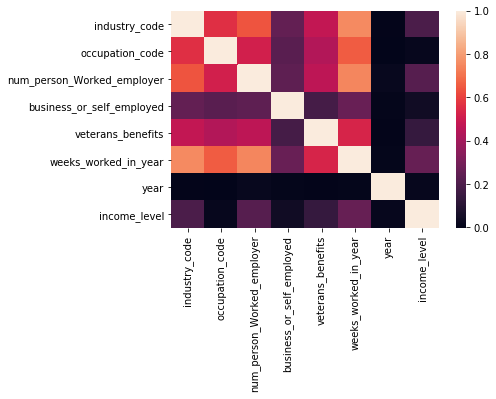

In [30]:
sns.heatmap(corr)

In [31]:
num_train.drop(['weeks_worked_in_year'], axis = 1, inplace=True)
num_test.drop(['weeks_worked_in_year'], axis = 1, inplace=True)

In [32]:
num_test.shape

(99762, 7)

In [33]:
#Calculating null value percentage and dropping those greater than 48%
def removeNan(data):
    remove_col = []
    l = len(data)
    for col in data.columns:
        p = data[col].isnull().sum()*100/l
        if p>48:
            data.drop([col], axis = 1, inplace=True)
            remove_col.append(col)
    return data, remove_col

In [34]:
cat_train, remove_col = removeNan(cat_train)
cat_test.drop(remove_col, axis=1, inplace=True)

In [35]:
cat_test.shape

(99762, 29)

In [36]:
# Helper Function to make variables having frequency less than 5% to an other bin
def binCols(df):
    l = len(df)
    for col in df.columns:
        for key,val in df[col].value_counts().items():
            if val*100/l < 5.00:
                print(key," ", val)
                df[col].replace(to_replace=key, value="other", inplace=True)
    return df

In [2]:
cat_train = binCols(cat_train)
cat_test = binCols(cat_test)

In [38]:
cat_train['class_of_worker'].unique()

array(['Not in universe', 'other', 'Private'], dtype=object)

In [39]:
# Helper Function to replace Nan values by most frequent values
def replaceNanCat(data):
    for col in data.columns:
        if data[col].isnull().any():
            data[col].fillna(data[col].value_counts().idxmax(), inplace=True)

In [40]:
replaceNanCat(cat_train)
replaceNanCat(cat_test)

In [3]:
cat_train.isnull().any()

In [42]:
#cat_train = pd.get_dummies(cat_train)
#test_catData = pd.get_dummies(test_catData)

In [43]:
cat_train.shape

(199523, 29)

In [44]:
train_data = pd.concat([num_train, cat_train], axis = 1)
test_data = pd.concat([num_test, cat_test], axis = 1)

In [45]:
test_data.shape

(99762, 36)

In [46]:
test_data.shape

(99762, 36)

In [47]:
y_train = train_data['income_level']
y_test = test_data['income_level']

In [48]:
train_data.drop(['income_level'], inplace = True, axis = 1)
test_data.drop(['income_level'], inplace = True, axis = 1)

In [49]:
train_data.shape

(199523, 35)

In [50]:
test_data.shape

(99762, 35)

In [51]:
train_data = pd.get_dummies(train_data, columns=None)
test_data = pd.get_dummies(test_data, columns=None)

In [52]:
train_data.shape

(199523, 97)

## Handling Imbalanced Data

Using SMOTE and feeding dummy Variables

In [53]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [54]:
smote = SMOTE(k_neighbors=3, n_jobs=-1, ratio=1)

In [55]:
train_smote_dummy, yTrain_smote_dummy = smote.fit_resample(train_data, y_train)

Using SMOTENC and feeding catagorical variables

In [56]:
def separateCols(df):
    #num_train = []
    i=0
    cat_cols = []
    num_cols = df._get_numeric_data().columns
    for col in df.columns:
        if col not in num_cols:
            cat_cols.append(i)
        i += 1
            
    return cat_cols

In [57]:
cat_cols = separateCols(train_data)


### Model Training and Tuining

Using Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB

In [59]:
naive_bayes = GaussianNB()

In [60]:
naive_bayes.fit(train_smote_dummy, yTrain_smote_dummy)

GaussianNB(priors=None, var_smoothing=1e-09)

In [74]:
from sklearn.model_selection import cross_validate
scores = cross_validate(naive_bayes, train_smote_dummy, yTrain_smote_dummy, cv=3, scoring=('recall', 'precision', 'accuracy'),
                        return_train_score=True)

In [75]:
scores

{'fit_time': array([1.42243481, 1.37506056, 1.21609569]),
 'score_time': array([2.3902986 , 2.18266153, 1.96988726]),
 'test_recall': array([0.95678171, 0.97579352, 0.97556909]),
 'train_recall': array([0.97462328, 0.96785855, 0.96862802]),
 'test_precision': array([0.73285283, 0.73603386, 0.73416011]),
 'train_precision': array([0.73858059, 0.73282799, 0.73260142]),
 'test_accuracy': array([0.80400282, 0.81292081, 0.81115742]),
 'train_accuracy': array([0.81482847, 0.80749994, 0.80754002])}

Using XGBoost

In [86]:
import xgboost as xgb

In [88]:
from xgboost import XGBClassifier as xgbc

In [93]:
xg = xgbc(max_depth=5, eta=0.01, subsample=1, min_child_weight=10, colsample_bytree=0.80)

In [4]:
scores = cross_validate(xg, train_smote_dummy, yTrain_smote_dummy, cv=3, scoring=('recall', 'precision', 'accuracy'),
                        return_train_score=True)

In [ ]:
scores

In [5]:
xg.fit(train_smote_dummy, yTrain_smote_dummy)